# Data Preparation

In [1]:
%%capture
!pip install -r requirements.txt;

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import kaggle
import os
import shutil
import numpy as np

from src.data import extract
from src.data import transform


In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None) 
plt.style.use('ggplot')

DATA_DIR = "data/"

In [56]:
# # Download Fligt Delay Dataset form Kaggle
if len(os.listdir(DATA_DIR)) == 0: # Only download data if none is present
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(
        "robikscube/flight-delay-dataset-20182022",
        path=DATA_DIR,
        unzip=True,
    )

    for filename in os.listdir(DATA_DIR):
        f = os.path.join(DATA_DIR, filename)
        if f.endswith(".parquet") or filename == "Airlines.csv":
            pass
        else:
            if os.path.isfile(f):
                os.remove(f)
            else:
                shutil.rmtree(f)

In [3]:
main_df = pd.read_parquet('data/Combined_Flights_2020.parquet')
#main_df = extract.combine_parquet(data_path = "data/")

In [19]:
df = transform.prep_data(main_df,"data/airports.csv",departure_airport=["DEN","MEI"])

                   DepDelayMinutes  FlightCount
FlightDate Origin                              
2020-01-01 DEN            7.537451          769
           MEI            0.000000            2
2020-01-02 DEN           11.897185          821
           MEI           26.500000            2
2020-01-03 DEN            8.947044          813


In [63]:
df.head()

,FlightDate,tavg,tmin,tmax,prcp,wdir,wspd,pres,Origin,DepDelayMinutes,FlightCount,day_of_week,is_weekend
0,2020-01-01,2.8,-4.3,10.0,0.0,243.0,21.6,999.6,DEN,7.537451,769,2,0
1,2020-01-02,2.8,-2.7,7.2,0.0,294.0,12.2,1005.3,DEN,11.897185,821,3,0
2,2020-01-03,0.6,-7.1,8.9,0.0,238.0,18.4,1017.1,DEN,8.947044,813,4,0
3,2020-01-04,5.3,-2.1,16.7,0.0,221.0,21.2,1017.5,DEN,14.016878,714,5,1
4,2020-01-05,4.9,-4.9,7.2,0.0,158.0,23.0,1021.5,DEN,13.563363,799,6,1


In [58]:
def time_series_plot(data,normalize=True):# plot timeseries for departur delay minutes
  
    fig, ax = plt.subplots( figsize=(20,6))
    origins = data['Origin'].unique()
    # plot a line for each origin
    for origin in origins:
        df_subset = data[data['Origin'] == origin]
        if normalize:
            normalized_numbers = (np.array(df_subset['DepDelayMinutes']) - np.min(df_subset['DepDelayMinutes'])) / (np.max(df_subset['DepDelayMinutes']) - np.min(df_subset['DepDelayMinutes']))
            ax.plot(df_subset['FlightDate'],normalized_numbers, linestyle='-',label=origin)
        else:
            ax.plot(df_subset['FlightDate'],df_subset['DepDelayMinutes'], linestyle='-',label=origin)




    # add a legend and show the plot
    ax.legend()
    plt.xlabel('Time')
    plt.ylabel('Mean departure delayed minutes');

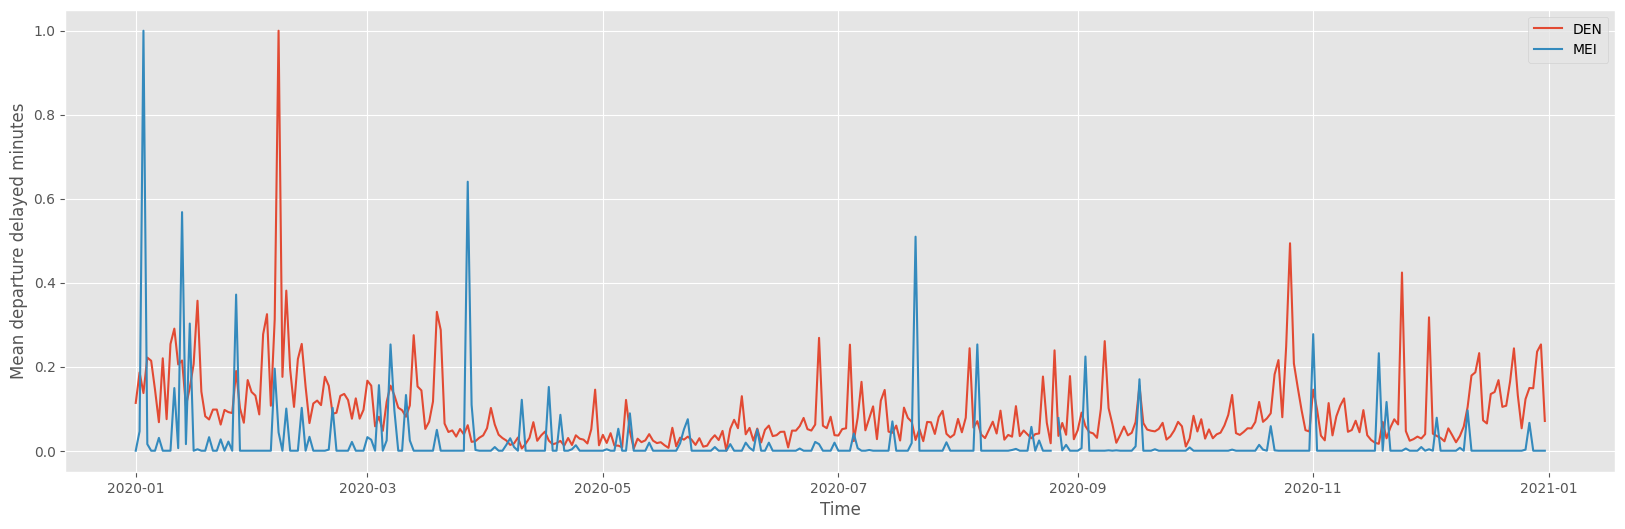

In [59]:
time_series_plot(df,normalize=True)

In [34]:
def correlation_matrix(data,airport):
    # compute the correlation matrix
    data = data[data['Origin'] == airport]
    data = data.drop('Origin', axis=1)
    corr_matrix = data.corr()

    # plot the correlation matrix using imshow()
    plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    # customize the plot
    plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns,rotation = 90)
    plt.yticks(np.arange(len(corr_matrix.index)), corr_matrix.index)
    plt.colorbar()

    # display the plot
    plt.show()

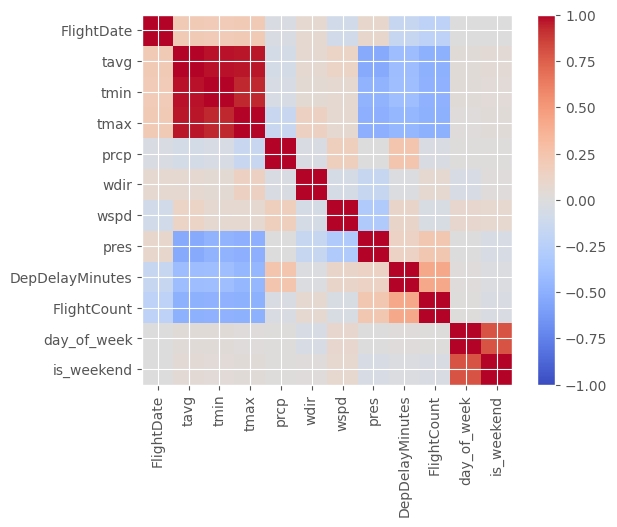

In [35]:
correlation_matrix(df,"DEN")

In [61]:
import seaborn as sns
def time_series_plot(data,column="DepDelayMinutes"):# plot timeseries for departur delay minutes
  
    fig, ax = plt.subplots( figsize=(20,6))
    origins = data['Origin'].unique()
    # plot a line for each origin
    for origin in origins:
        df_subset = data[data['Origin'] == origin]

        sns.kdeplot(df_subset[column], fill=True,ax=ax,label=origin)
        
    # add a legend and show the plot
    ax.legend()
    plt.xlabel('Time')
    plt.ylabel('Mean departure delayed minutes');

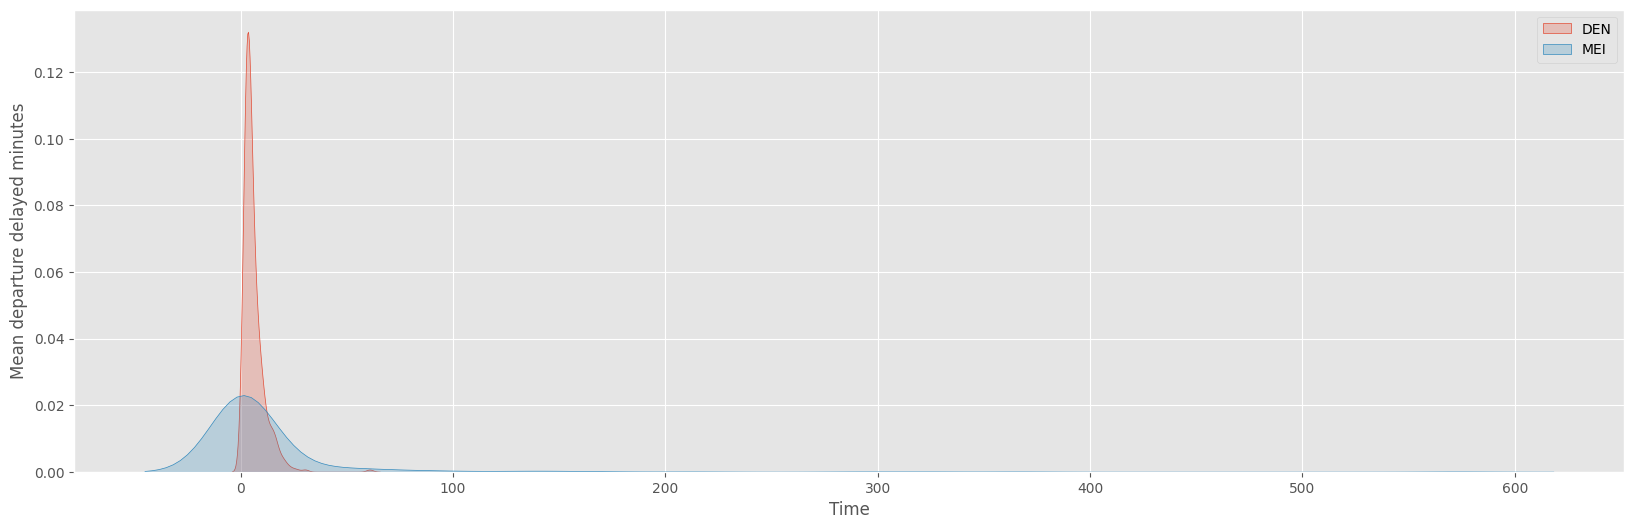

In [65]:

time_series_plot(df,column="DepDelayMinutes")

In [74]:
import seaborn as sns
def daily_plot(data,column="DepDelayMinutes"):# plot timeseries for departur delay minutes
  
    fig, ax = plt.subplots(figsize=(20,6))
    origins = data['Origin'].unique()
    # plot a line for each origin
    for origin in origins:
        df_subset = data[data['Origin'] == origin]
        df_subset = df_subset.drop('Origin', axis=1)

        df_subset.groupby("day_of_week").mean()[column].plot(ax=ax,label=origin)
        ax.set_xlabel("Day of Week")
        ax.set_ylabel(column)
        
    # add a legend and show the plot
    ax.legend()
    plt.xlabel('Time')
    plt.ylabel('Mean departure delayed minutes');

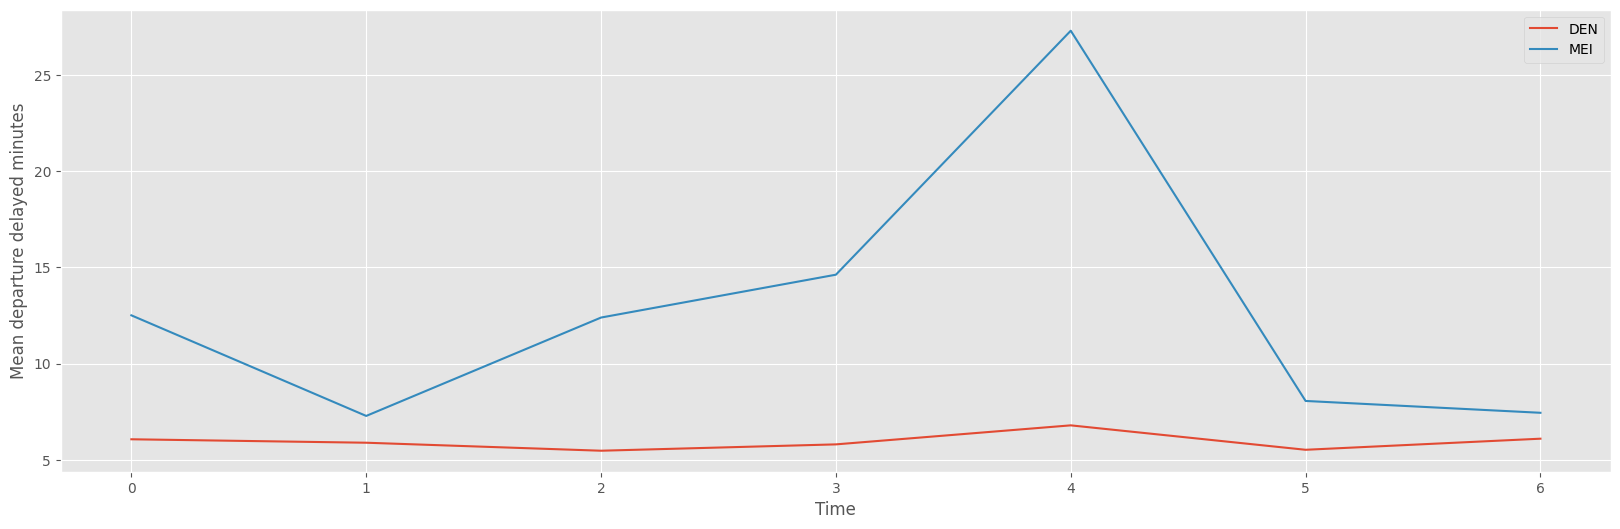

In [75]:
daily_plot(df,column="DepDelayMinutes")